In [20]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
# read file
df = pd.read_csv('Istanbul Weather Data.csv')
df.head()

,DateTime,Condition,Rain,MaxTemp,MinTemp,SunRise,SunSet,MoonRise,MoonSet,AvgWind,AvgHumidity,AvgPressure
0,02.09.2019,Partly cloudy,0.0,27,22,06:32:00,19:37:00,9:52:00,21:45:00,23,66,1012
1,01.09.2019,Partly cloudy,0.0,27,22,06:31:00,19:38:00,8:37:00,21:13:00,21,66,1011
2,31.08.2019,Patchy rain possible,0.5,26,22,06:30:00,19:40:00,7:21:00,20:40:00,22,63,1015
3,30.08.2019,Partly cloudy,0.0,27,22,06:29:00,19:42:00,6:4:00,20:5:00,20,64,1016
4,29.08.2019,Partly cloudy,0.0,27,23,06:27:00,19:43:00,4:47:00,19:26:00,24,61,1015


In [3]:
# drop unwanted columns
to_drop=[1,5,6,7,8]
df.drop(df.columns[to_drop], axis=1, inplace=True)
df.head()

,DateTime,Rain,MaxTemp,MinTemp,AvgWind,AvgHumidity,AvgPressure
0,02.09.2019,0.0,27,22,23,66,1012
1,01.09.2019,0.0,27,22,21,66,1011
2,31.08.2019,0.5,26,22,22,63,1015
3,30.08.2019,0.0,27,22,20,64,1016
4,29.08.2019,0.0,27,23,24,61,1015


In [4]:
# Check for corr
df =df.drop('DateTime',axis=1)
corr = df.corr()
print(corr)

                 Rain   MaxTemp   MinTemp   AvgWind  AvgHumidity  AvgPressure
Rain         1.000000 -0.144952 -0.123754  0.155156     0.278792    -0.153274
MaxTemp     -0.144952  1.000000  0.946626 -0.140458    -0.469191    -0.436150
MinTemp     -0.123754  0.946626  1.000000 -0.047940    -0.371696    -0.399119
AvgWind      0.155156 -0.140458 -0.047940  1.000000     0.201916     0.076457
AvgHumidity  0.278792 -0.469191 -0.371696  0.201916     1.000000    -0.013038
AvgPressure -0.153274 -0.436150 -0.399119  0.076457    -0.013038     1.000000


In [5]:
# Selecting Features and Labels
X = df[['Rain', 'AvgWind', 'AvgHumidity', 'AvgPressure','MinTemp']]
y_maxT = df['MaxTemp']
#y_minT = df['MinTemp']

# Scaling 
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Train-Test split
#X_train, X_test, y_maxT_train, y_maxT_test, y_minT_train, y_minT_test = train_test_split(X_scaled, y_maxT,y_minT, test_size= 0.3, random_state=42)
X_train, X_test, y_maxT_train, y_maxT_test = train_test_split(X_scaled, y_maxT, test_size= 0.2, random_state=42)

# Model
MaxT_model = RandomForestRegressor(n_estimators= 100, random_state=42)
#MinT_model = RandomForestRegressor(n_estimators= 100, random_state=42)

# Fit model
MaxT_model.fit(X_train, y_maxT_train)
#MinT_model.fit(X_train, y_minT_train)


RandomForestRegressor(random_state=42)

In [12]:
# Model Evaluation
y_maxT_pred = MaxT_model.predict(X_test)
#y_minT_pred = MinT_model.predict(X_test)

# Mean squared error
maxT_mse = mean_squared_error(y_maxT_test,y_maxT_pred)
#minT_mse = mean_squared_error(y_minT_test, y_minT_pred)

# R^2 
maxT_r2 = r2_score(y_maxT_test,y_maxT_pred)
#minT_r2 = r2_score(y_minT_test, y_minT_pred)

print('Maximum Temp MSE = ', maxT_mse)
#print('Minimum Temp MSE = ', minT_mse)
print('Maximum Temp R^2 = ',maxT_r2)
#print('Minimum Temp R^2 = ', minT_r2)


Maximum Temp MSE =  4.650395543484359
Maximum Temp R^2 =  0.9217002407425525


In [16]:
# Rain predict
z = df[['Rain', 'AvgWind', 'AvgPressure','MaxTemp','MinTemp']]
y_h = df['AvgHumidity']

# Scaling
scaler = MinMaxScaler()
z_scaled = scaler.fit_transform(z)

In [17]:
# Train-Test split
z_train, z_test, y_h_train, y_h_test = train_test_split(z_scaled, y_h, test_size= 0.3, random_state=42)

# Fit model
h_model = RandomForestRegressor(n_estimators=100, random_state=42)
h_model.fit(z_train,y_h_train)

RandomForestRegressor(random_state=42)

In [18]:
# model evaluation
y_h_pred = h_model.predict(z_test)

h_mse = mean_squared_error(y_h_test,y_h_pred)
h_r2 = r2_score(y_h_test, y_h_pred)

print('Humidity MSE =', h_mse)
print('Humidity r2 = ', h_r2)

Humidity MSE = 59.38585330213673
Humidity r2 =  0.3714594824630243


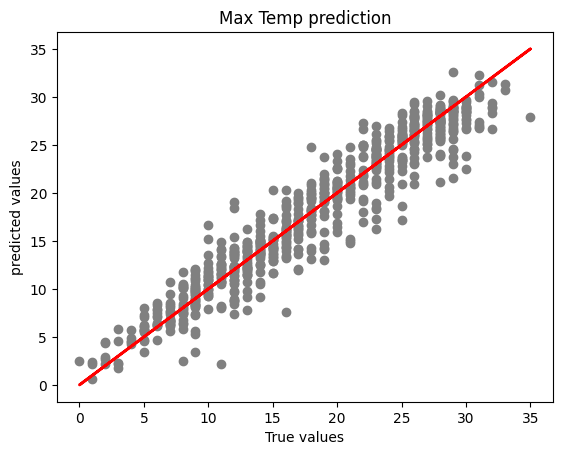

In [25]:
# Plot Max temp
plt.scatter(y_maxT_test,y_maxT_pred, color = 'grey')
plt.plot(y_maxT_test, y_maxT_test, color = 'red', linewidth = 2)
plt.xlabel('True values')
plt.ylabel('predicted values')
plt.title('Max Temp prediction')
plt.show()

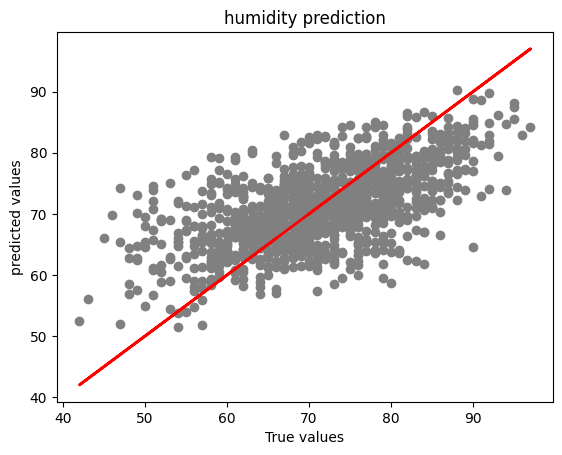

In [26]:
# Plot humidity
plt.scatter(y_h_test,y_h_pred, color = 'grey')
plt.plot(y_h_test, y_h_test, color = 'red', linewidth = 2)
plt.xlabel('True values')
plt.ylabel('predicted values')
plt.title('humidity prediction')
plt.show()